## Importing Required Libraries

In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

In [3]:
from sklearn.model_selection import train_test_split

from sklearn.linear_model import (
    LogisticRegression,
    SGDClassifier,
)

from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

from sklearn.svm import SVC

from sklearn.tree import DecisionTreeClassifier

from sklearn.neighbors import KNeighborsClassifier

from sklearn.ensemble import RandomForestClassifier

from sklearn.neural_network import MLPClassifier

from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    log_loss,
    roc_auc_score,
    confusion_matrix
)

In [4]:
import xgboost as xgb

In [5]:
import pickle

## Reading the Cleaned Dataset

In [6]:
dataset = pd.read_csv("cleaned_dateset.csv")

## Splitting the dataset

### Splitting into features and labels

In [7]:
features = dataset.iloc[:, :-1]
labels = dataset.iloc[:, -1]

In [8]:
features.head()

,Unnamed: 0,having_IP_address,url_Length,shortening_service,having_At_Symbol,double_slash_redirecting,prefix_suffix,having_sub_domain,SSL_final_State,domain_registration_length,...,redirect,on_mouseover,right_click,age_of_domain,DNS_record,web_traffic,page_rank,google_index,links_pointing_to_page,statistical_report
0,0,-1,1,1,1,-1,-1,-1,-1,-1,...,0,1,1,-1,-1,-1,-1,1,1,-1
1,1,1,1,1,1,1,-1,0,1,-1,...,0,1,1,-1,-1,0,-1,1,1,1
2,2,1,0,1,1,1,-1,-1,-1,-1,...,0,1,1,1,-1,1,-1,1,0,-1
3,3,1,0,1,1,1,-1,-1,-1,1,...,0,1,1,-1,-1,1,-1,1,-1,1
4,4,1,0,-1,1,1,-1,1,1,-1,...,0,-1,1,-1,-1,0,-1,1,1,1


In [9]:
labels.head()

0   -1
1   -1
2   -1
3   -1
4    1
Name: result, dtype: int64

### Splitting the dataset into train and test data

In [10]:
featuresTraining, featuresTesting, labelsTraining, labelsTesting = train_test_split(features, labels, test_size = 1/3, random_state = 369)

In [11]:
featuresTraining

,Unnamed: 0,having_IP_address,url_Length,shortening_service,having_At_Symbol,double_slash_redirecting,prefix_suffix,having_sub_domain,SSL_final_State,domain_registration_length,...,redirect,on_mouseover,right_click,age_of_domain,DNS_record,web_traffic,page_rank,google_index,links_pointing_to_page,statistical_report
3172,3172,1,-1,1,1,1,-1,0,1,-1,...,0,1,1,-1,1,1,-1,1,0,1
10506,10506,-1,-1,1,-1,1,-1,0,-1,1,...,0,-1,1,1,1,0,-1,1,1,1
3025,3025,1,-1,1,1,1,-1,1,1,-1,...,0,-1,-1,1,-1,1,-1,1,1,-1
3803,3803,1,-1,1,1,1,-1,-1,-1,1,...,0,1,1,-1,-1,0,-1,-1,0,1
5718,5718,1,-1,1,-1,1,-1,0,0,1,...,1,-1,1,-1,1,0,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7098,7098,1,-1,1,1,1,-1,0,1,-1,...,0,1,1,-1,1,0,1,1,0,1
4370,4370,1,1,1,-1,1,-1,0,-1,-1,...,0,1,1,-1,-1,-1,-1,-1,1,1
1389,1389,1,-1,1,1,1,-1,1,1,-1,...,0,1,1,1,1,0,-1,1,-1,1
270,270,1,-1,1,1,1,-1,0,-1,-1,...,0,1,1,-1,1,1,-1,1,0,1


In [12]:
featuresTesting

,Unnamed: 0,having_IP_address,url_Length,shortening_service,having_At_Symbol,double_slash_redirecting,prefix_suffix,having_sub_domain,SSL_final_State,domain_registration_length,...,redirect,on_mouseover,right_click,age_of_domain,DNS_record,web_traffic,page_rank,google_index,links_pointing_to_page,statistical_report
8307,8307,1,-1,1,1,1,-1,0,1,1,...,0,-1,1,1,1,1,-1,1,0,1
5196,5196,-1,-1,-1,-1,-1,-1,1,1,-1,...,1,1,1,-1,-1,-1,1,1,0,1
9876,9876,1,-1,1,1,1,-1,0,-1,-1,...,0,1,1,1,1,0,-1,-1,0,1
1221,1221,1,1,1,1,1,1,0,1,-1,...,0,1,1,-1,1,0,-1,-1,0,1
3346,3346,1,-1,1,1,1,-1,1,1,-1,...,0,1,1,1,1,1,-1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10703,10703,1,-1,1,-1,1,-1,-1,-1,1,...,0,1,1,1,1,1,-1,-1,0,-1
1429,1429,1,1,1,1,1,-1,0,-1,-1,...,0,-1,1,-1,1,1,-1,1,0,1
5416,5416,1,-1,1,-1,1,-1,1,1,-1,...,0,1,1,-1,1,1,1,1,0,1
10255,10255,-1,1,1,1,1,-1,1,-1,1,...,0,1,1,1,1,0,1,-1,1,1


## Model Building

### Logistic Regression

In [13]:
classifier = LogisticRegression()
classifier.fit(featuresTraining, labelsTraining)

LogisticRegression()

In [14]:
y_pred = classifier.predict(featuresTesting)
logisticAccuracy = accuracy_score(labelsTesting, y_pred)
logisticPrecision = precision_score(labelsTesting, y_pred)
logisticRecall = recall_score(labelsTesting, y_pred)
logisticF1 = f1_score(labelsTesting, y_pred)
logisticLogLoss = log_loss(labelsTesting, y_pred)
logisticAucScore = roc_auc_score(labelsTesting, y_pred)
logisticConfusionMatrix = confusion_matrix(labelsTesting, y_pred)

In [15]:
print(f"Accuracy: {logisticAccuracy}")
print(f"Precision: {logisticPrecision}")
print(f"Recall: {logisticRecall}")
print(f"F1 Score: {logisticF1}")
print(f"Log Loss: {logisticLogLoss}")
print(f"AUC Score: {logisticAucScore}")
print("Confusion Matrix:")
print(logisticConfusionMatrix)

Accuracy: 0.9242876526458615
Precision: 0.9218974604695735
Recall: 0.9431372549019608
F1 Score: 0.9323964138599466
Log Loss: 2.6150472044942212
AUC Score: 0.9220245545026522
Confusion Matrix:
[[1482  163]
 [ 116 1924]]


### Stochastic Gradient Descent (SGD)

In [16]:
classifier = SGDClassifier()
classifier.fit(featuresTraining, labelsTraining)

SGDClassifier()

In [17]:
y_pred = classifier.predict(featuresTesting)
stochasticAccuracy = accuracy_score(labelsTesting, y_pred)
stochasticPrecision = precision_score(labelsTesting, y_pred)
stochasticRecall = recall_score(labelsTesting, y_pred)
stochasticF1 = f1_score(labelsTesting, y_pred)
stochasticLogLoss = log_loss(labelsTesting, y_pred)
stochasticAucScore = roc_auc_score(labelsTesting, y_pred)
stochasticConfusionMatrix = confusion_matrix(labelsTesting, y_pred)

In [18]:
print(f"Accuracy: {stochasticAccuracy}")
print(f"Precision: {stochasticPrecision}")
print(f"Recall: {stochasticRecall}")
print(f"F1 Score: {stochasticF1}")
print(f"Log Loss: {stochasticLogLoss}")
print(f"AUC Score: {stochasticAucScore}")
print("Confusion Matrix:")
print(stochasticConfusionMatrix)

Accuracy: 0.5004070556309362
Precision: 0.9502262443438914
Recall: 0.10294117647058823
F1 Score: 0.18575851393188852
Log Loss: 17.255331380896145
AUC Score: 0.5481271231897015
Confusion Matrix:
[[1634   11]
 [1830  210]]


### Support Vector Machine (SVM)

In [19]:
classifier = SVC()
classifier.fit(featuresTraining, labelsTraining)

SVC()

In [20]:
y_pred = classifier.predict(featuresTesting)
svmAccuracy = accuracy_score(labelsTesting, y_pred)
svmPrecision = precision_score(labelsTesting, y_pred)
svmRecall = recall_score(labelsTesting, y_pred)
svmF1 = f1_score(labelsTesting, y_pred)
svmLogLoss = log_loss(labelsTesting, y_pred)
svmAucScore = roc_auc_score(labelsTesting, y_pred)
svmConfusionMatrix = confusion_matrix(labelsTesting, y_pred)

In [21]:
print(f"Accuracy: {svmAccuracy}")
print(f"Precision: {svmPrecision }")
print(f"Recall: {svmRecall}")
print(f"F1 Score: {svmF1}")
print(f"Log Loss: {svmLogLoss}")
print(f"AUC Score: {svmAucScore}")
print("Confusion Matrix:")
print(svmConfusionMatrix)

Accuracy: 0.55359565807327
Precision: 0.55359565807327
Recall: 1.0
F1 Score: 0.7126637554585152
Log Loss: 15.418616691289213
AUC Score: 0.5
Confusion Matrix:
[[   0 1645]
 [   0 2040]]


### Decision Tree

In [22]:
classifier = DecisionTreeClassifier()
classifier.fit(featuresTraining, labelsTraining)

DecisionTreeClassifier()

In [23]:
y_pred = classifier.predict(featuresTesting)
decisionTreeAccuracy = accuracy_score(labelsTesting, y_pred)
decisionTreePrecision = precision_score(labelsTesting, y_pred)
decisionTreeRecall = recall_score(labelsTesting, y_pred)
decisionTreeF1 = f1_score(labelsTesting, y_pred)
decisionTreeLogLoss = log_loss(labelsTesting, y_pred)
decisionTreeAucScore = roc_auc_score(labelsTesting, y_pred)
decisionTreeConfusionMatrix = confusion_matrix(labelsTesting, y_pred)

In [24]:
print(f"Accuracy: {decisionTreeAccuracy}")
print(f"Precision: {decisionTreePrecision}")
print(f"Recall: {decisionTreeRecall}")
print(f"F1 Score: {decisionTreeF1}")
print(f"Log Loss: {decisionTreeLogLoss}")
print(f"AUC Score: {decisionTreeAucScore}")
print("Confusion Matrix:")
print(decisionTreeConfusionMatrix)

Accuracy: 0.95359565807327
Precision: 0.9494949494949495
Recall: 0.9676470588235294
F1 Score: 0.9584850691915513
Log Loss: 1.6027719732048573
AUC Score: 0.9519086357947435
Confusion Matrix:
[[1540  105]
 [  66 1974]]


### K Nearest Neighbors (KNN)

In [25]:
classifier = KNeighborsClassifier()
classifier.fit(featuresTraining, labelsTraining)

KNeighborsClassifier()

In [26]:
y_pred = classifier.predict(featuresTesting)
knnAccuracy = accuracy_score(labelsTesting, y_pred)
knnPrecision = precision_score(labelsTesting, y_pred)
knnRecall = recall_score(labelsTesting, y_pred)
knnF1 = f1_score(labelsTesting, y_pred)
knnLogLoss = log_loss(labelsTesting, y_pred)
knnAucScore = roc_auc_score(labelsTesting, y_pred)
knnConfusionMatrix = confusion_matrix(labelsTesting, y_pred)

In [27]:
print(f"Accuracy: {knnAccuracy}")
print(f"Precision: {knnPrecision}")
print(f"Recall: {knnRecall}")
print(f"F1 Score: {knnF1}")
print(f"Log Loss: {knnLogLoss}")
print(f"AUC Score: {knnAucScore}")
print("Confusion Matrix:")
print(knnConfusionMatrix)

Accuracy: 0.5744911804613297
Precision: 0.6090573012939002
Recall: 0.6460784313725491
F1 Score: 0.6270218839200761
Log Loss: 14.696737543187488
AUC Score: 0.5658963585434174
Confusion Matrix:
[[ 799  846]
 [ 722 1318]]


### Random Forest

In [28]:
classifier = RandomForestClassifier()
classifier.fit(featuresTraining, labelsTraining)

RandomForestClassifier()

In [29]:
y_pred = classifier.predict(featuresTesting)
randomForestAccuracy = accuracy_score(labelsTesting, y_pred)
randomForestPrecision = precision_score(labelsTesting, y_pred)
randomForestRecall = recall_score(labelsTesting, y_pred)
randomForestF1 = f1_score(labelsTesting, y_pred)
randomForestLogLoss = log_loss(labelsTesting, y_pred)
randomForestAucScore = roc_auc_score(labelsTesting, y_pred)
randomForestConfusionMatrix = confusion_matrix(labelsTesting, y_pred)

In [30]:
print(f"Accuracy: {randomForestAccuracy}")
print(f"Precision: {randomForestPrecision}")
print(f"Recall: {randomForestRecall}")
print(f"F1 Score: {randomForestF1}")
print(f"Log Loss: {randomForestLogLoss}")
print(f"AUC Score: {randomForestAucScore}")
print("Confusion Matrix:")
print(randomForestConfusionMatrix)

Accuracy: 0.9677069199457259
Precision: 0.9611137782045127
Recall: 0.9813725490196078
F1 Score: 0.9711375212224109
Log Loss: 1.1153810470518912
AUC Score: 0.9660662137195304
Confusion Matrix:
[[1564   81]
 [  38 2002]]


### XG Boost (XGB)

In [31]:
classifier = xgb.XGBClassifier()
classifier.fit(featuresTraining, labelsTraining)

[14:20:23] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=4,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [32]:
y_pred = classifier.predict(featuresTesting)
xgbAccuracy = accuracy_score(labelsTesting, y_pred)
xgbPrecision = precision_score(labelsTesting, y_pred)
xgbRecall = recall_score(labelsTesting, y_pred)
xgbF1 = f1_score(labelsTesting, y_pred)
xgbLogLoss = log_loss(labelsTesting, y_pred)
xgbAucScore = roc_auc_score(labelsTesting, y_pred)
xgbConfusionMatrix = confusion_matrix(labelsTesting, y_pred)

In [33]:
print(f"Accuracy: {xgbAccuracy}")
print(f"Precision: {xgbPrecision}")
print(f"Recall: {xgbRecall}")
print(f"F1 Score: {xgbF1}")
print(f"Log Loss: {xgbLogLoss}")
print(f"AUC Score: {xgbAucScore}")
print("Confusion Matrix:")
print(xgbConfusionMatrix)

Accuracy: 0.9614654002713704
Precision: 0.9620253164556962
Recall: 0.9686274509803922
F1 Score: 0.9653150952613581
Log Loss: 1.3309548484876188
AUC Score: 0.9606055188032661
Confusion Matrix:
[[1567   78]
 [  64 1976]]


### Multi Layer Perceptron (MLP)

In [34]:
classifier = MLPClassifier()
classifier.fit(featuresTraining, labelsTraining)

MLPClassifier()

In [35]:
y_pred = classifier.predict(featuresTesting)
mlpAccuracy = accuracy_score(labelsTesting, y_pred)
mlpPrecision = precision_score(labelsTesting, y_pred)
mlpRecall = recall_score(labelsTesting, y_pred)
mlpF1 = f1_score(labelsTesting, y_pred)
mlpLogLoss = log_loss(labelsTesting, y_pred)
mlpAucScore = roc_auc_score(labelsTesting, y_pred)
mlpConfusionMatrix = confusion_matrix(labelsTesting, y_pred)

In [36]:
print(f"Accuracy: {mlpAccuracy}")
print(f"Precision: {mlpPrecision}")
print(f"Recall: {mlpRecall}")
print(f"F1 Score: {mlpF1}")
print(f"Log Loss: {mlpLogLoss}")
print(f"AUC Score: {mlpAucScore}")
print("Confusion Matrix:")
print(mlpConfusionMatrix)

Accuracy: 0.5690637720488467
Precision: 0.9669421487603306
Recall: 0.22941176470588234
F1 Score: 0.37083993660855785
Log Loss: 14.884013489464602
AUC Score: 0.6098426604684426
Confusion Matrix:
[[1629   16]
 [1572  468]]


### Quadratic Discriminant Analysis (QDA)

In [37]:
classifier = QuadraticDiscriminantAnalysis()
classifier.fit(featuresTraining, labelsTraining)

QuadraticDiscriminantAnalysis()

In [38]:
y_pred = classifier.predict(featuresTesting)
qdaAccuracy = accuracy_score(labelsTesting, y_pred)
qdaPrecision = precision_score(labelsTesting, y_pred)
qdaRecall = recall_score(labelsTesting, y_pred)
qdaF1 = f1_score(labelsTesting, y_pred)
qdaLogLoss = log_loss(labelsTesting, y_pred)
qdaAucScore = roc_auc_score(labelsTesting, y_pred)
qdaConfusionMatrix = confusion_matrix(labelsTesting, y_pred)

In [39]:
print(f"Accuracy: {qdaAccuracy}")
print(f"Precision: {qdaPrecision}")
print(f"Recall: {qdaRecall}")
print(f"F1 Score: {qdaF1}")
print(f"Log Loss: {qdaLogLoss}")
print(f"AUC Score: {qdaAucScore}")
print("Confusion Matrix:")
print(qdaConfusionMatrix)

Accuracy: 0.576933514246947
Precision: 1.0
Recall: 0.2357843137254902
F1 Score: 0.38159460531535105
Log Loss: 14.61219875160536
AUC Score: 0.6178921568627451
Confusion Matrix:
[[1645    0]
 [1559  481]]


## Comparison of F1 Score using Visualization

In [40]:
f1Scores = [
    ["Logistic", logisticF1],
    ["SGD", stochasticF1],
    ["SVM", svmF1],
    ["Decision Tree", decisionTreeF1],
    ["KNN", knnF1],
    ["Random Forest", randomForestF1],
    ["XGB", xgbF1],
    ["MLP", mlpF1],
    ["QDA", qdaF1]
]

#### Sorting the 'f1Scores' list based on the f1Score value

In [41]:
f1Scores.sort(key = lambda item: -item[1])

#### Converting the list to dictionary

In [42]:
f1Scores = dict(f1Scores)

#### Splitting the keys and values from the dictionary

In [43]:
algoName = f1Scores.keys()
algoF1 = f1Scores.values()

#### Visualization

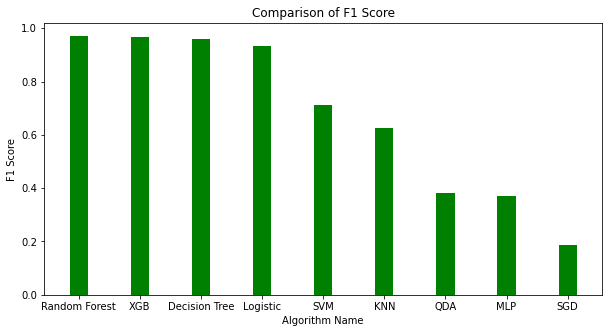

In [44]:
fig = plt.figure(figsize = (10, 5))

plt.bar(algoName, algoF1, color = "green", width = 0.3)

plt.xlabel("Algorithm Name")
plt.ylabel("F1 Score")
plt.title("Comparison of F1 Score")
plt.show()

From the above comparison of the F1 Scores of various algorithms, it is clear that the "Random Forest" algorithm performs the best for the dataset.
Hence, we select the "Random Forest" model for the prediction.

## Saving the model

In [45]:
randomForestClassifier = RandomForestClassifier()
randomForestClassifier.fit(featuresTraining, labelsTraining)

RandomForestClassifier()

In [46]:
pickle.dump(randomForestClassifier, open('model.pkl', 'wb'))